In [146]:
import pandas as pd
import numpy as np
import  scipy
from  math import  sqrt
import matplotlib.pyplot as plt
import matplotlib

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn. model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
credit = pd.read_csv('C:/Users/espencer/OneDrive/Academico/BECA CENFOTEC/Material del curso/Actividades/Actividad 5/Informe 1/defaultOfCreditCardClients.csv', header =1)

In [3]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [6]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
credit.ID.value_counts(dropna=False)

2047     1
1322     1
15629    1
9486     1
11535    1
        ..
17053    1
23198    1
21151    1
10928    1
2049     1
Name: ID, Length: 30000, dtype: int64

In [8]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
credit.isnull().any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

In [10]:
credit.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [11]:
credit.duplicated().any()

False

In [12]:
credit.duplicated("ID").any()

False

In [13]:
credit.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [14]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [15]:
credit['SEX'] = credit['SEX'].astype('category')

In [16]:
credit.SEX.dtype

CategoricalDtype(categories=[1, 2], ordered=False)

In [17]:
#credit['SEX'] = credit.SEX.replace({1:'Male', 2:'Female'}) 

In [18]:
credit['EDUCATION'] = credit['EDUCATION'].astype('category')

In [19]:
credit.EDUCATION.dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6], ordered=False)

In [20]:
#credit['EDUCATION'] = credit.EDUCATION.replace({0:'others', 1:'graduate_School', 2:'university', 3:'high_school', 4:'others', 5:'others', 6:'others'}) 

In [21]:
credit['MARRIAGE'] = credit['MARRIAGE'].astype('category')

In [22]:
credit.MARRIAGE.dtype

CategoricalDtype(categories=[0, 1, 2, 3], ordered=False)

In [23]:
#credit['MARRIAGE'] = credit.MARRIAGE.replace({1:'Married', 2:'Single', 3:'Divorce', 0:'Others'}) 

In [24]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6      

In [25]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


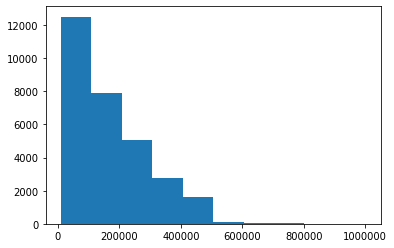

In [26]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

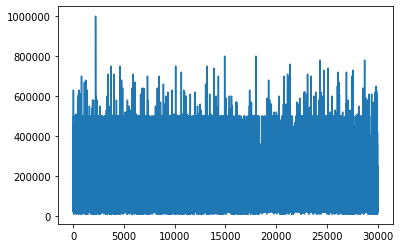

In [27]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

In [28]:
x = credit['PAY_0']
y = credit['PAY_2']

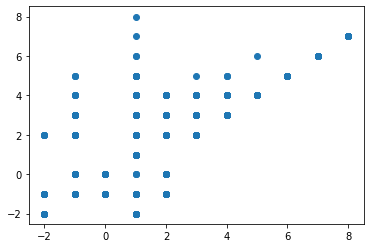

In [29]:
plt.scatter(x,y)
plt.show()

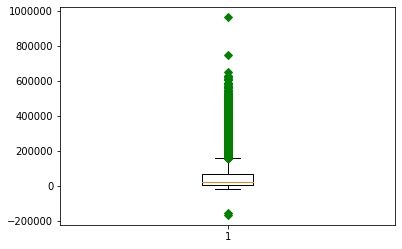

In [30]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

C:\Users\espencer\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


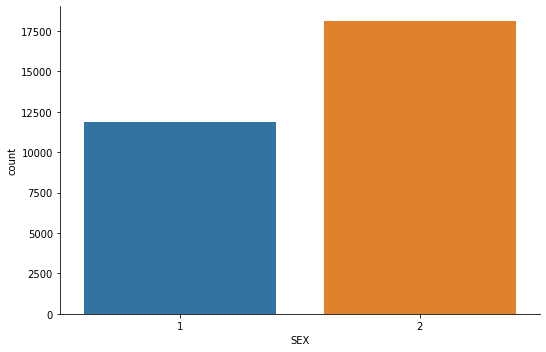

In [31]:
fg = sns.factorplot('SEX', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('SEX')

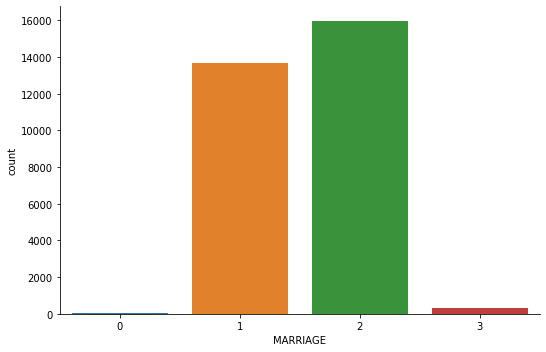

In [32]:
fg = sns.factorplot('MARRIAGE', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('MARRIAGE')

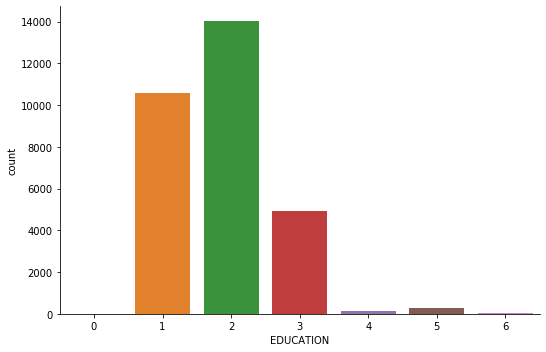

In [33]:
fg = sns.factorplot('EDUCATION', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('EDUCATION')

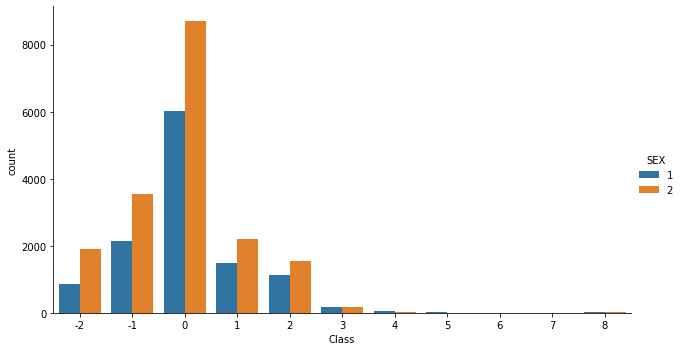

In [34]:
g = sns.factorplot('PAY_0', data=credit, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('Class')

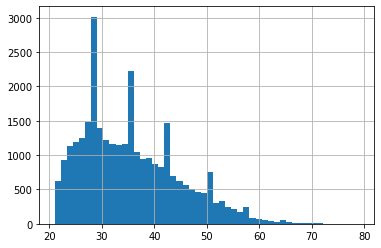

In [35]:
credit['AGE'].hist(bins=50)

In [36]:
TempCredit = credit

In [37]:
TempCredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6      

In [38]:
del TempCredit['BILL_AMT1']
del TempCredit['BILL_AMT2']
del TempCredit['BILL_AMT3']
del TempCredit['BILL_AMT4']
del TempCredit['BILL_AMT5']
del TempCredit['BILL_AMT6']
del TempCredit['AGE']
del TempCredit['LIMIT_BAL']
del TempCredit['ID']
del TempCredit['PAY_AMT1']
del TempCredit['PAY_AMT2']
del TempCredit['PAY_AMT3']
del TempCredit['PAY_AMT4']
del TempCredit['PAY_AMT5']
del TempCredit['PAY_AMT6']
del TempCredit['default payment next month']

In [39]:
credit.corr(method="pearson")

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
PAY_0,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553
PAY_2,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501
PAY_3,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684
PAY_4,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449
PAY_5,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900
PAY_6,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000


In [40]:
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [129]:
array = TempCredit.values
X = array[:,0:6]
Y = array[:,6]
#X_train, Y_train = train_test_split(X, train_size=.25) 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.25, random_state=0)

In [130]:
print(str(X_validation.shape)+str(Y_validation.shape))

(7500, 6)(7500,)


In [131]:
modelSVR.fit(X_train,Y_train)

C:\Users\espencer\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [132]:
modelRF.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [133]:
modelLR.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
print(cross_val_score(modelRF, X_train, Y_train)) 

C:\Users\espencer\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.6257677  0.66437752 0.6535121 ]


In [135]:
print(cross_val_score(modelSVR, X_train, Y_train)) 

C:\Users\espencer\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\espencer\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\espencer\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\espencer\AppData\Local\Continuum\anaconda3\

[0.62133553 0.64600261 0.63568442]


In [136]:
print(cross_val_score(modelLR, X_train, Y_train)) 

[0.59932269 0.63507676 0.62672925]


C:\Users\espencer\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [137]:
modelRF.score(X_train,Y_train)

0.6916676685799448

In [138]:
predictions = modelRF.predict(X_validation)

In [139]:
rmse = sqrt(mean_squared_error(Y_validation, predictions))

In [140]:
predRsquared = r2_score(Y_validation,predictions)

In [141]:
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.656
RMSE: 0.680


ValueError: 'c' argument has 2 elements, which is not acceptable for use with 'x' with size 7500, 'y' with size 7500.

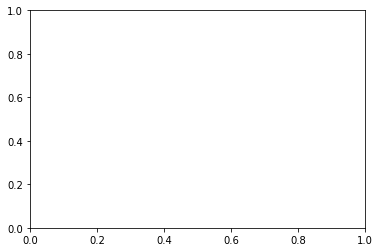

In [151]:
plt.scatter(Y_validation, predictions, color=("blue","red"), alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [149]:
print(accuracy_score(Y_validation, predictions, normalize=False)) 

ValueError: Classification metrics can't handle a mix of unknown and continuous targets

In [152]:
print(confusion_matrix(Y_validation, predictions))

ValueError: Classification metrics can't handle a mix of unknown and continuous targets

In [147]:
print(classification_report(Y_validation, predictions))

ValueError: Classification metrics can't handle a mix of unknown and continuous targets